# IMPORTS

In [24]:
import pandas as pd
import numpy as np
import sklearn
import bayes_opt
from sklearn import svm
from tensorflow import keras
from sklearn import linear_model
from sklearn. neighbors import  KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [6]:
def load_data():
    """
    Load the data needed for Workshop 5
    """
    seed = 130
    
    # Load Kmer data
    train_kmers = np.load(r"C:\Users\gangu\Downloads\data (1)\data\train_test_data\train_kmers.npy", allow_pickle=True)
    test_kmers = np.load(r"C:\Users\gangu\Downloads\data (1)\data\train_test_data\test_kmers.npy", allow_pickle=True)

    # Load target data & IDs
    y_train = np.load(r"C:\Users\gangu\Downloads\data (1)\data\train_test_data\y_train.npy", allow_pickle=True)
    y_train_ids = np.load(r"C:\Users\gangu\Downloads\data (1)\data\train_test_data\train_ids.npy", allow_pickle=True).astype(str)
    y_test_ids = np.load(r"C:\Users\gangu\Downloads\data (1)\data\train_test_data\test_ids.npy", allow_pickle=True).astype(str)

    # Load raw gene data for optional neural network section
    train_gene_alignment = pd.read_csv(r"C:\Users\gangu\Downloads\data (1)\data\train_test_data\train_genes.csv")
    
    return train_kmers, test_kmers, y_train, y_train_ids, y_test_ids, train_gene_alignment

# Corrected way to call load_data and assign returned values
X_train_kmers, X_test_kmers, y_train, y_train_ids, y_test_ids, train_gene_alignment = load_data()


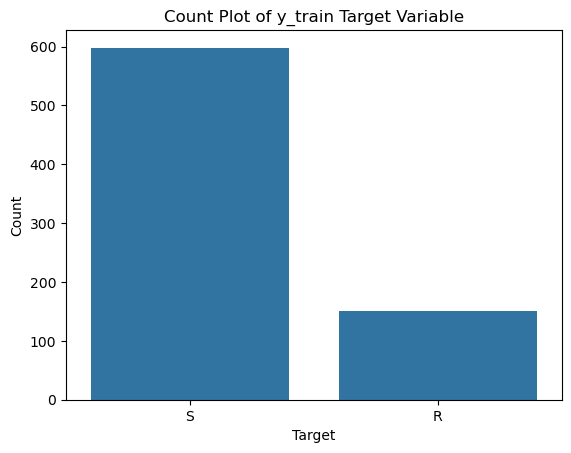

In [7]:
y_train_df = pd.DataFrame(y_train, columns=['y_train'])

# Plot the count plot for y_train
sns.countplot(x='y_train', data=y_train_df)
plt.title('Count Plot of y_train Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Logistic Regression Model

In [8]:
logistic_model = linear_model.LogisticRegression(class_weight='balanced', penalty= None)
logistic_model.fit(X_train_kmers, y_train.reshape(-1))

C:\Users\gangu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', penalty=None)

In [9]:
y_pred_train_log_kmers = logistic_model.predict(X_train_kmers)
sklearn.metrics.balanced_accuracy_score(y_train, y_pred_train_log_kmers)

0.9457190635451505

In [10]:
logistic_model = linear_model.LogisticRegression(class_weight='balanced',penalty='l2')
logistic_model.fit(X_train_kmers, y_train.reshape(-1))

C:\Users\gangu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [11]:
y_pred_train_log_kmers = logistic_model.predict(X_train_kmers)
sklearn.metrics.balanced_accuracy_score(y_train, y_pred_train_log_kmers)

0.9473801560758083

SVM Model

In [ ]:
svm_model = svm.SVC(kernel = 'poly', C= 1.0)
svm_model.fit(X_train_kmers, y_train.reshape(-1))

In [ ]:
y_pred_train_svm = svm_model.predict(X_train_kmers)
sklearn.metrics.balanced_accuracy_score(y_train, y_pred_train_svm)

In [ ]:
svm_model = svm.SVC(kernel = 'sigmoid', C= 1.0)
svm_model.fit(X_train_kmers, y_train.reshape(-1))

In [ ]:
y_pred_train_svm = svm_model.predict(X_train_kmers)
sklearn.metrics.balanced_accuracy_score(y_train, y_pred_train_svm)

In [ ]:
svm_model = svm.SVC(kernel = 'rbf', C= 1.0)
svm_model.fit(X_train_kmers, y_train.reshape(-1))

In [ ]:
y_pred_train_svm = svm_model.predict(X_train_kmers)
sklearn.metrics.balanced_accuracy_score(y_train, y_pred_train_svm)

# KNN Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_kmers, y_train.reshape(-1))

In [ ]:
y_pred_train_knn = knn.predict(X_train_kmers)
sklearn.metrics.balanced_accuracy_score(y_train, y_pred_train_knn)

# Gaussian Naive Bayes 

In [12]:
model = GaussianNB(priors=[0.75, 0.25], var_smoothing=1e-9)
model.fit(X_train_kmers, y_train.reshape(-1))

GaussianNB(priors=[0.75, 0.25])

In [13]:
y_pred_train_NB = model.predict(X_train_kmers)
sklearn.metrics.balanced_accuracy_score(y_train, y_pred_train_NB)

0.984113712374582

# Cross Validation of Logistic Regression

In [14]:
y_train = y_train.reshape(-1)
cv_scores = cross_val_score(logistic_model, X_train_kmers, y_train, cv = 5)

C:\Users\gangu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gangu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [15]:
print(cv_scores)

[0.88666667 0.92       0.84       0.83892617 0.8590604 ]


Naive Bayes Cross Validation

In [16]:
y_train = y_train.reshape(-1)
cv_scores = cross_val_score(model, X_train_kmers, y_train, cv = 5)

In [17]:
print(cv_scores)

[0.8        0.86       0.82       0.84563758 0.8590604 ]


In [18]:
mean_cv_scores = cv_scores.mean()
print(mean_cv_scores)

0.8369395973154361


# Grid search of Naive Bayes

In [19]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv=5, scoring = 'balanced_accuracy')
grid_search.fit(X_train_kmers, y_train.reshape(-1))
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'var_smoothing': 1e-05}
Best cross-validation score:  0.8130882352941177


In [21]:
seed = 130
param_dist = {
    'var_smoothing': np.logspace(-9,0,100)
}
random_search = RandomizedSearchCV(estimator = model, param_distributions = param_dist, n_iter = 20, scoring = 'balanced_accuracy', cv = 5, random_state = seed)
random_search.fit(X_train_kmers, y_train.reshape(-1))
print("Best hyperparameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

Best hyperparameters found:  {'var_smoothing': 0.004328761281083062}
Best cross-validation score:  0.8781022408963587


In [22]:
param_space = {
    'var_smoothing': (1e-9, 1e-1)
}
bayes_search = BayesSearchCV(estimator = model, search_spaces = param_space, n_iter = 30, cv = 5 , random_state = seed)
bayes_search.fit(X_train_kmers, y_train.reshape(-1))
print("Best hyperparameters: ", bayes_search.best_params_)
print("Best cross-validation score: ", bayes_search.best_score_)

Best hyperparameters:  OrderedDict([('var_smoothing', 0.005708279771278293)])
Best cross-validation score:  0.8849664429530201


In [23]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
param_space = {
    'var_smoothing': (1e-9, 1e-1)  # Define the parameter range
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# For storing confusion matrices of each fold
confusion_matrices = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X_train_kmers, y_train):
    X_train_fold, X_test_fold = X_train_kmers[train_index], X_train_kmers[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Fit model on training fold
    model.fit(X_train_fold, y_train_fold.ravel())
    
    # Predict on the test fold
    y_pred = model.predict(X_test_fold)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test_fold, y_pred)
    confusion_matrices.append(cm)

# Display the confusion matrices for each fold
for i, cm in enumerate(confusion_matrices, 1):
    print(f"Confusion Matrix for Fold {i}:\n{cm}\n")


Confusion Matrix for Fold 1:
[[ 17  13]
 [ 10 110]]

Confusion Matrix for Fold 2:
[[ 21   9]
 [  9 111]]

Confusion Matrix for Fold 3:
[[ 13  17]
 [ 11 109]]

Confusion Matrix for Fold 4:
[[ 20  10]
 [  9 110]]

Confusion Matrix for Fold 5:
[[ 13  17]
 [ 15 104]]



In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define the GaussianNB model
model = GaussianNB(priors=[0.75, 0.25], var_smoothing=1e-9)

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
confusion_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X_train_kmers, y_train):
    X_train_fold, X_test_fold = X_train_kmers[train_index], X_train_kmers[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Fit model on training fold
    model.fit(X_train_fold, y_train_fold.ravel())
    
    # Predict on the test fold
    y_pred = model.predict(X_test_fold)
    
    # Calculate confusion matrix and metrics for this fold
    cm = confusion_matrix(y_test_fold, y_pred)
    accuracy = accuracy_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred, average='weighted')
    recall = recall_score(y_test_fold, y_pred, average='weighted')
    f1 = f1_score(y_test_fold, y_pred, average='weighted')
    
    # Store metrics
    confusion_matrices.append(cm)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Display the confusion matrices and metrics for each fold
for i, cm in enumerate(confusion_matrices, 1):
    print(f"Confusion Matrix for Fold {i}:\n{cm}\n")
    print(f"Accuracy for Fold {i}: {accuracies[i-1]:.4f}")
    print(f"Precision for Fold {i}: {precisions[i-1]:.4f}")
    print(f"Recall for Fold {i}: {recalls[i-1]:.4f}")
    print(f"F1 Score for Fold {i}: {f1_scores[i-1]:.4f}\n")

# Display average metrics across all folds
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")


Confusion Matrix for Fold 1:
[[ 17  13]
 [ 10 110]]

Accuracy for Fold 1: 0.8467
Precision for Fold 1: 0.8414
Recall for Fold 1: 0.8467
F1 Score for Fold 1: 0.8436

Confusion Matrix for Fold 2:
[[ 21   9]
 [  9 111]]

Accuracy for Fold 2: 0.8800
Precision for Fold 2: 0.8800
Recall for Fold 2: 0.8800
F1 Score for Fold 2: 0.8800

Confusion Matrix for Fold 3:
[[ 13  17]
 [ 11 109]]

Accuracy for Fold 3: 0.8133
Precision for Fold 3: 0.8004
Recall for Fold 3: 0.8133
F1 Score for Fold 3: 0.8052

Confusion Matrix for Fold 4:
[[ 20  10]
 [  9 110]]

Accuracy for Fold 4: 0.8725
Precision for Fold 4: 0.8710
Recall for Fold 4: 0.8725
F1 Score for Fold 4: 0.8717

Confusion Matrix for Fold 5:
[[ 13  17]
 [ 15 104]]

Accuracy for Fold 5: 0.7852
Precision for Fold 5: 0.7799
Recall for Fold 5: 0.7852
F1 Score for Fold 5: 0.7824

Average Accuracy: 0.8395
Average Precision: 0.8345
Average Recall: 0.8395
Average F1 Score: 0.8366


# Grid search of Logistic Regression

In [10]:
param_dist = {
    'C': np.logspace(-4,4,20),
    'penalty': [ 'l1', 'l2'],
}
grid_search = GridSearchCV(estimator = logistic_model, param_grid = param_dist, cv=5, scoring = 'balanced_accuracy')
grid_search.fit(X_train_kmers, y_train.reshape(-1))
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

C:\Users\gangu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gangu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best parameters found:  {'C': 0.0001, 'penalty': 'l2'}
Best cross-validation score:  0.8622969187675071


C:\Users\gangu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\gangu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\gangu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\gangu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Outer CV scores: [0.8025, 0.8473869346733669, 0.7598492462311557]
Mean outer CV score: 0.8032 +/- 0.0357


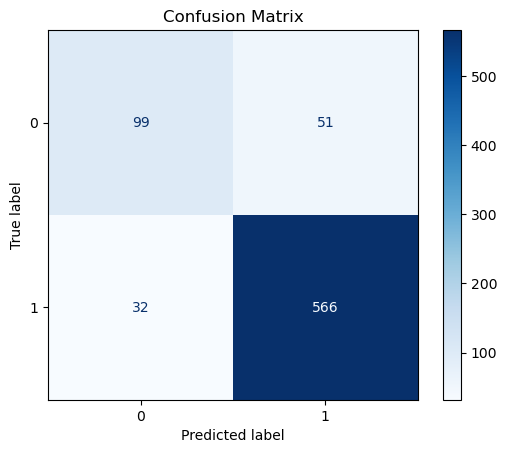

In [12]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
seed = 130

# Define parameter grid for GridSearch
param_dist = {
    'C': [0.001],
    'penalty': ['l2'],
}

outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
outer_scores = []
y_true_outer = []  # To store true labels for the outer test set
y_pred_outer = []  # To store predicted labels for the outer test set

# Outer CV Loop
for train_index, test_index in outer_cv.split(X_train_kmers, y_train):
    X_train, X_test = X_train_kmers[train_index], X_train_kmers[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
    logistic_model = LogisticRegression(solver='liblinear', max_iter=10000, multi_class='auto')
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_dist, cv=inner_cv, scoring='balanced_accuracy', n_jobs=-1)
    
    # Fit GridSearchCV
    grid_search.fit(X_train, y_train_fold)
    
    # Make predictions on the outer test set
    y_pred = grid_search.predict(X_test)
    
    # Store true and predicted labels
    y_true_outer.extend(y_test_fold)
    y_pred_outer.extend(y_pred)
    
    # Calculate score for outer CV
    score = grid_search.score(X_test, y_test_fold)
    outer_scores.append(score)

# Output the scores
print(f"Outer CV scores: {outer_scores}")
print(f"Mean outer CV score: {np.mean(outer_scores):.4f} +/- {np.std(outer_scores):.4f}")

# Calculate and display the confusion matrix
cm = confusion_matrix(y_true_outer, y_pred_outer)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [14]:
accuracy = accuracy_score(y_true_outer, y_pred_outer)
precision = precision_score(y_true_outer, y_pred_outer, average='weighted')
recall = recall_score(y_true_outer, y_pred_outer, average='weighted')
f1 = f1_score(y_true_outer, y_pred_outer, average='weighted')

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8890
Precision: 0.8849
Recall: 0.8890
F1 Score: 0.8862


In [ ]:
test_preds = model.predict(X_test_kmers)
test_preds_df = pd.DataFrame(data={"genome_id":y_test_ids.reshape(-1), "y_pred":test_preds})
test_preds_df.to_csv(r"C:\Users\gangu\OneDrive\Desktop\naivebayes_test_preds.csv", index=False)
print("File saved successfully.")

In [ ]:
print(test_preds_df)

In [ ]:
y_test_ids

In [ ]:
print(f"Length of y_test_ids: {len(y_test_ids)}")
print(f"Length of test_preds: {len(test_preds)}")

In [ ]:
test_preds = logistic_model.predict(X_test_kmers)
test_preds_df = pd.DataFrame(data={"genome_id":y_test_ids.reshape(-1), "y_pred":test_preds})
test_preds_df.to_csv(r"C:\Users\gangu\OneDrive\Desktop\logistic_test_preds.csv", index=False)
print("File saved successfully.")

Decision Tree

In [16]:
tree_model = tree.DecisionTreeClassifier(
    max_depth = 4, 
    random_state = seed,
)
tree_model.fit(X_train_kmers, y_train.reshape(-1))

y_pred_train_tree_kmer = tree_model.predict(X_train_kmers)

In [17]:
sklearn.metrics.balanced_accuracy_score(y_train, y_pred_train_tree_kmer)

0.9407803790412486

In [21]:
cv_scores = cross_val_score(tree_model, X_train_kmers, y_train, cv = 5)

In [22]:
print(cv_scores)

[0.88       0.84666667 0.86       0.77852349 0.8590604 ]


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}
tree_model = DecisionTreeClassifier(random_state = seed)
grid_search = GridSearchCV(estimator = tree_model,
                           param_grid = param_grid,
                           cv=5,
                           scoring = 'accuracy',
                          n_jobs=-1)
grid_search.fit(X_train_kmers, y_train.reshape(-1))
best_params = grid_search.best_params_
best_score = grid_search.best_score_
y_pred_train_tree_kmer = grid_search.predict(X_train_kmers)
print("Best Parameters:", best_params)
print("Best Cross-validation Score:", best_score)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-validation Score: 0.8702908277404923


In [ ]:
test_preds = tree_model.predict(X_test_kmers)

# Save
test_preds_df = pd.DataFrame(data={"genome_id":y_test_ids, "y_pred":test_preds})
test_preds_df.to_csv(r"C:\Users\gangu\OneDrive\Desktop\decision_tree_test_preds.csv", index=False) 